<a href="https://colab.research.google.com/github/Akankshaxnegi/CODSOFT_TASK-2/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-2: IRIS  FLOWER  CLASSIFICATION**

**AUTHOR : AKANKSHA NEGI**

**BATCH : SEPTEMBER**

**DOMAIN : DATA SCIENCE**

In [1]:
# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# LOADING  THE  DATASET

In [4]:
data = pd.read_csv("/content/IRIS.csv")

In [5]:
# Show the first five columns of the dataset " IRIS.csv"
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Displaying the statistical data of the dataset
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Displaying some more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# To display Sample of each class
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
# PREPROCESSING  THE  DATASET

In [10]:
# Handling the null values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
# DATA  VISUALISATION

<Axes: >

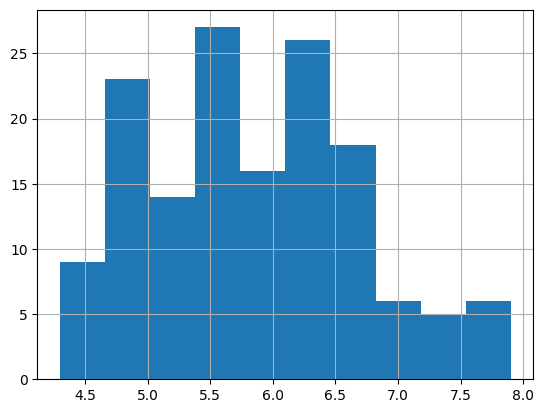

In [12]:
# Visualising all the columns of the dataset "IRIS.csv" by using HISTOGRAM
data["sepal_length"].hist()

<Axes: >

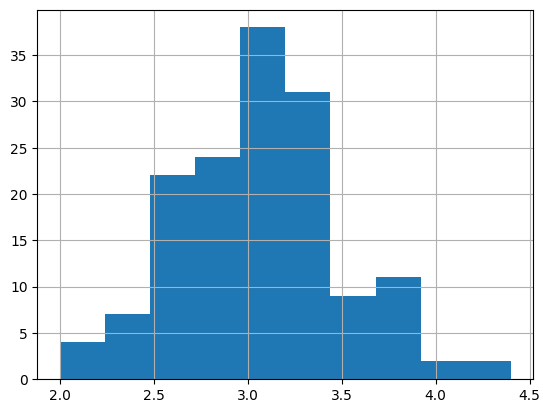

In [13]:
data["sepal_width"].hist()

<Axes: >

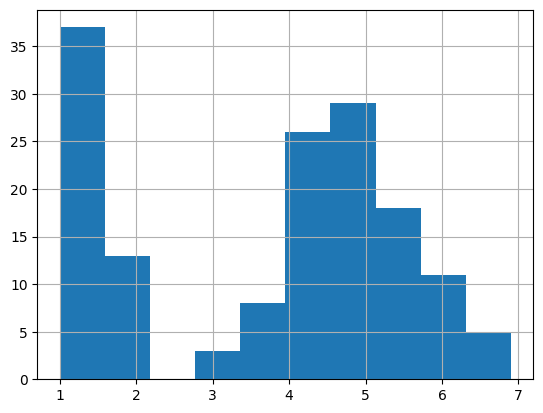

In [14]:
data["petal_length"].hist()

<Axes: >

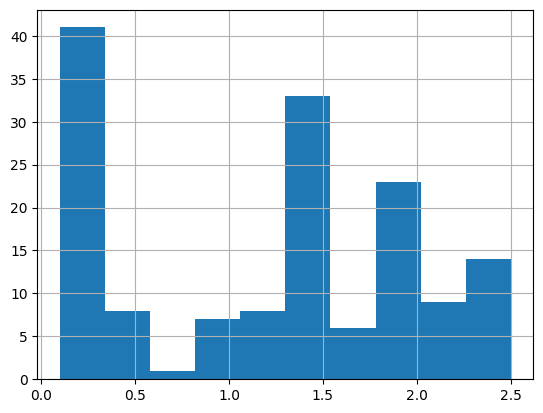

In [15]:
data["petal_width"].hist()

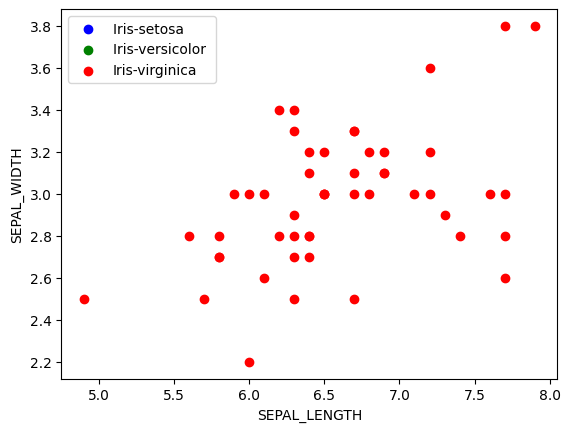

In [16]:
# Visualising each class of the dataset using different colors by using SCATTERPLOT
color=['blue','green','red']
species=['Iris-setosa ','Iris-versicolor ','Iris-virginica' ]
for i in range(3):
  a=data[data['species']==species[i]]
  plt.scatter(a['sepal_length'],a['sepal_width'],c=color[i],label=species[i])
plt.xlabel("SEPAL_LENGTH")
plt.ylabel("SEPAL_WIDTH")
plt.legend()

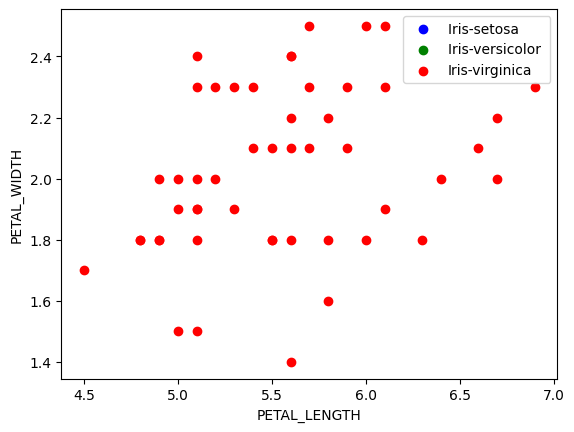

In [17]:
# Visualising on the basis of species by taking "PETAL_LENGTH" & " PETAL_WIDTH"
for i in range(3):
  a=data[data['species']==species[i]]
  plt.scatter(a['petal_length'],a['petal_width'],c=color[i],label=species[i])
plt.xlabel("PETAL_LENGTH")
plt.ylabel("PETAL_WIDTH")
plt.legend()

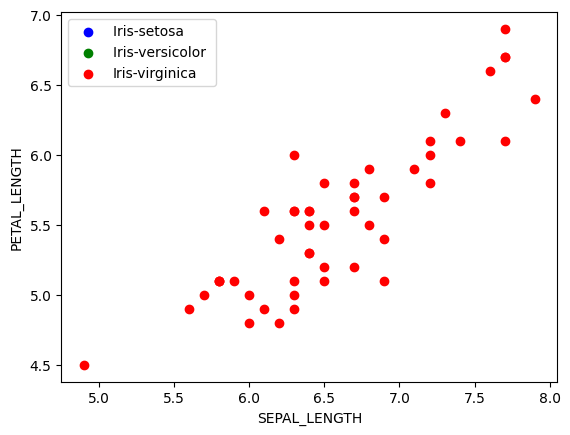

In [18]:
# Visualising on the basis of species by taking "SEPAL_LENGTH" & " PETAL_LENGTH"
for i in range(3):
  a=data[data['species'] == species[i]]
  plt.scatter(a['sepal_length'], a['petal_length'], c=color[i], label=species[i])
plt.xlabel("SEPAL_LENGTH")
plt.ylabel("PETAL_LENGTH")
plt.legend()

In [19]:
# COORELATION  MATRIX
# Finding the coorelation coefficient between two variable in form of a table
data.corr()

<ipython-input-19-1bc5399c7459>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-20-96c1a8381411>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

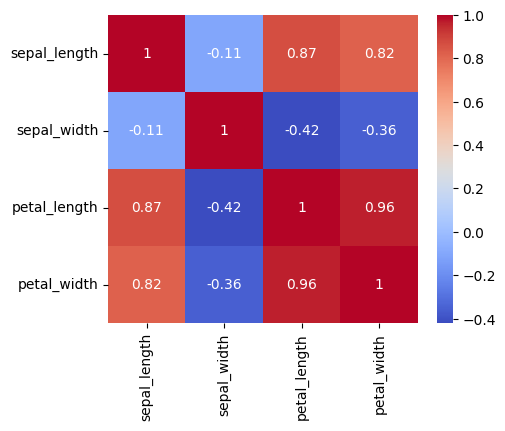

In [20]:
# Visualising the coorelation matrix by a heatmap
corr=data.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True , ax=ax, cmap="coolwarm")

**LABEL  ENCODER**

In [21]:
# Converting the labels into numeric form to make it machine readable
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['species']=l.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**MODEL  TRAINING**

In [22]:
#Training the model with train = 70 % and  test = 30 %
from sklearn.model_selection import train_test_split
x=data.drop(columns=['species'])
y=data['species']
x_train,x_test,y_train,y_test=train_test_split(x , y, test_size=0.30)

In [23]:
# Importing LogisticRegression Model (MODEL  TRAINING )
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(x_train , y_train)

LinearRegression()

In [24]:
# Performance metric
print("ACCURACY : ",m.score(x_test , y_test ) * 100)

ACCURACY :  94.43539394262103


In [25]:
# Importing KNeighborsClassifier Model
from sklearn.neighbors import KNeighborsClassifier
m = KNeighborsClassifier()
m.fit(x_train , y_train)

KNeighborsClassifier()

In [26]:
# Performance metric
print("ACCURACY : ",m.score(x_test , y_test ) * 100)

ACCURACY :  97.77777777777777


In [27]:
# Importing DecisionTree Model
from sklearn.tree import DecisionTreeClassifier
m = DecisionTreeClassifier()
m.fit(x_train , y_train)

DecisionTreeClassifier()

In [28]:
# Performance metric
print("ACCURACY : ",m.score(x_test , y_test ) * 100)

ACCURACY :  97.77777777777777


**CONCLUSION**:-  
The model shows the accuracy rate by using different model for testing and training purposes. Through Data Visualization we can classify flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.